Make Moons 数据集是一个用于分类任务的合成数据集，通常用于测试和展示非线性分类算法的性能。这个数据集由 sklearn 库中的 make_moons 函数生成，其特点是两个半圆形的类别，彼此之间有一些重叠。

数据集特征：

特征数量： 2

类别数量： 2

数据分布： 两个半圆形的类别，彼此之间有一定的重叠，不是线性可分的。

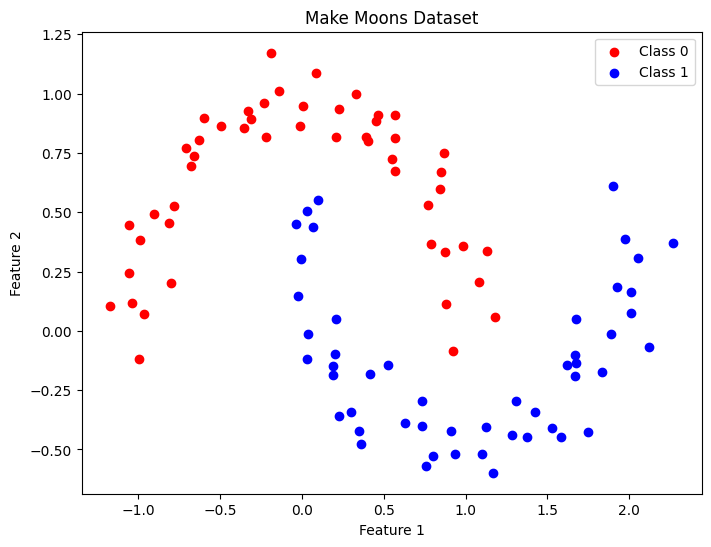

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 生成 Make Moons 数据集
X, y = make_moons(n_samples=100, noise=0.1, random_state=42) # 生成 100 个样本点，噪声为 0.1 

# 绘制数据集
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Make Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


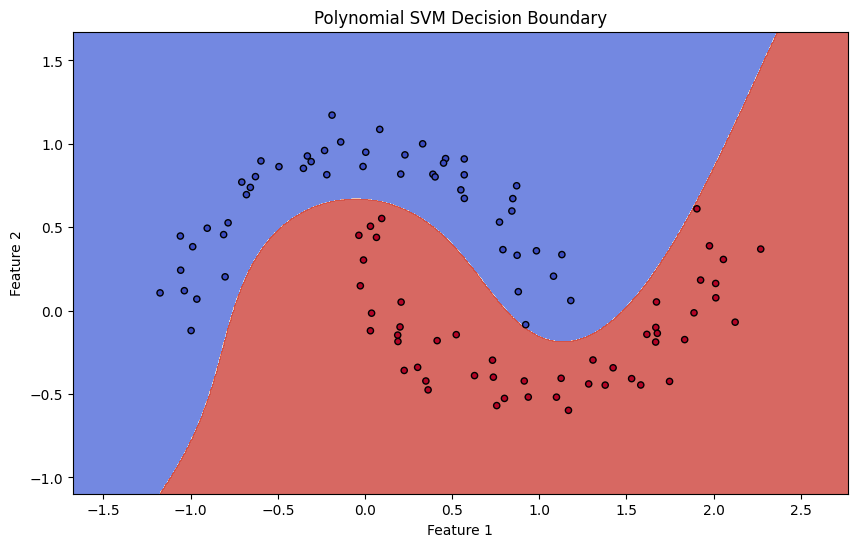

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# 生成 Make Moons 数据集
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# 定义 Polynomial SVM 模型
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

# 拟合模型
polynomial_svm_clf.fit(X, y)

# 定义绘制分割边界的函数
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Polynomial SVM Decision Boundary')

# 绘制分割边界
plt.figure(figsize=(10, 6))
plot_decision_boundary(polynomial_svm_clf, X, y)
plt.show()


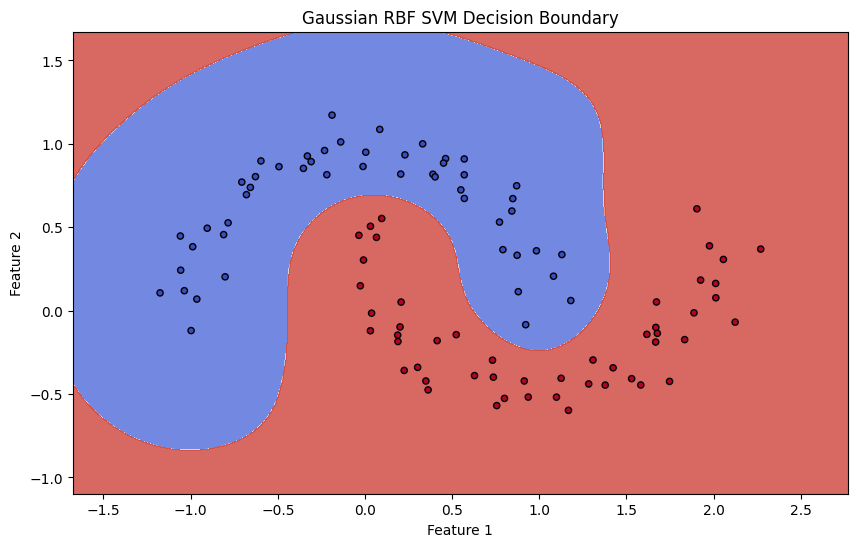

In [1]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# 生成 Make Moons 数据集
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# 定义 Gaussian RBF 内核 SVM 模型
rbf_svm_clf = SVC(kernel="rbf", gamma=5, C=10)

# 拟合模型
rbf_svm_clf.fit(X, y)

# 定义绘制分割边界的函数
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Gaussian RBF SVM Decision Boundary')

# 绘制分割边界
plt.figure(figsize=(10, 6))
plot_decision_boundary(rbf_svm_clf, X, y)
plt.show()
